In [362]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress

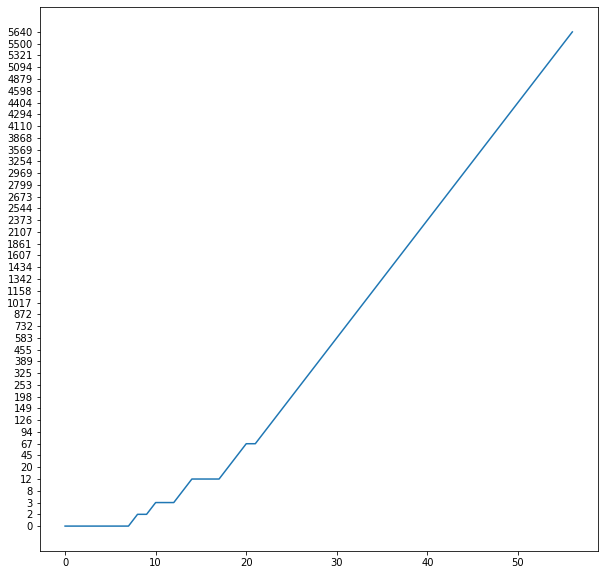

In [363]:
# Read data from file

data = genfromtxt(fname = 'WHO-COVID-19-global-data.csv',
                  dtype=str,
                  skip_header = 1,
                  delimiter = ',',
                  usecols = (0, 1, 5),
                 )
def filter_data (country):
    fdata =np.empty((0,3))
    i=0;
    while i<len(data):
        if (data[i][1] == country) and (datetime.strptime(data[i][0],'%Y-%m-%d') >= datetime.strptime('2020-03-01','%Y-%m-%d')):
            fdata = np.append(fdata,[np.array(data[i])],axis=0)
        i += 1
    return fdata

# Filter data with specified country code
fdata = filter_data('DE')
fig = plt.figure(figsize = (10,10))
plt.plot(fdata[:,2])
plt.show()

In [368]:
# Extract weekly based data from first week to specified week

def extract_week_data(num_week,fdata):
    temp_data = np.empty((0,3))
    i=0;
    while i<(num_week*7):
        temp_data = np.append(temp_data,[np.array(fdata[i])],axis=0)
        i += 1
    return temp_data

week1_data = extract_week_data(1,fdata)
week2_data = extract_week_data(2,fdata)
week3_data = extract_week_data(8,fdata)

In [365]:
# Define functions for Data matrix(A) and Output vector(z)

def create_data_matrix(week_data):
    data_matrix = np.empty((0,2),int)
    i=0;
    while i<len(week_data):
        data_matrix = np.append(data_matrix,[np.array([i+1,1])],axis=0)
        i += 1
    return data_matrix

def create_output_vector(week_data):
    output_vector = np.empty(0,int)
    i=0;
    while i<len(week_data):
        output_vector = np.append(output_vector,np.array([int(week_data[i][2])]))
        i += 1
    return output_vector
    

In [388]:
# Calculate the dependent variable vector (x)

A1 = create_data_matrix(week1_data)
A2 = create_data_matrix(week2_data)
A3 = create_data_matrix(week3_data)

z1 = create_output_vector(week1_data)
z2 = create_output_vector(week2_data)
z3 = create_output_vector(week3_data)

A1T = A1.transpose()
A2T = A2.transpose()
A3T = A3.transpose()

A1T_dot_A1 = np.dot(A1T,A1)
A2T_dot_A2 = np.dot(A2T,A2)
A3T_dot_A3 = np.dot(A3T,A3)

det_A1T_dot_A1 = np.linalg.det(A1T_dot_A1)
det_A2T_dot_A2 = np.linalg.det(A2T_dot_A2)
det_A3T_dot_A3 = np.linalg.det(A3T_dot_A3)

inv_A1T_dot_A1 = np.linalg.inv(A1T_dot_A1)
inv_A2T_dot_A2 = np.linalg.inv(A2T_dot_A2)
inv_A3T_dot_A3 = np.linalg.inv(A3T_dot_A3)

x1 = np.dot(inv_A1T_dot_A1,np.dot(A1T,z1))
x2 = np.dot(inv_A2T_dot_A2,np.dot(A2T,z2))
x3 = np.dot(inv_A3T_dot_A3,np.dot(A3T,z3))

In [369]:
#Approximate the data 

def regression(dep_var):
    approximate_output_matrix = np.empty(0,int)
    i=0;
    while i<len(fdata):
        result = (dep_var[0]*i) + dep_var[1]
        approximate_output_matrix = np.append(approximate_output_matrix,[int(result)],axis=0)
        i += 1
    return approximate_output_matrix
r3 = regression(x3)

#print(r3)

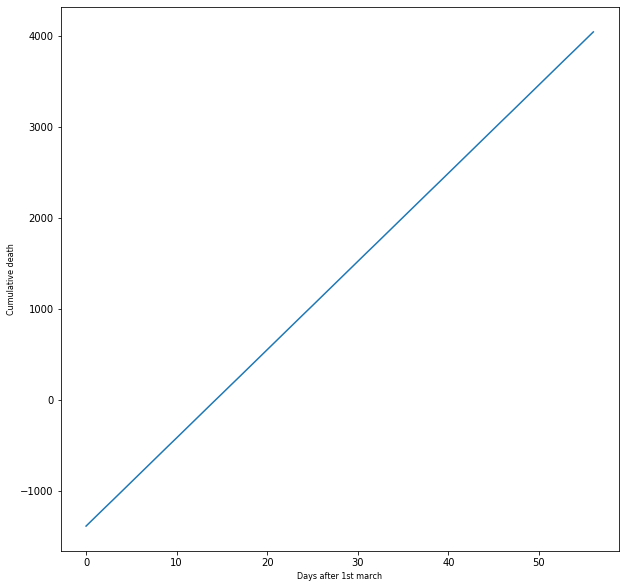

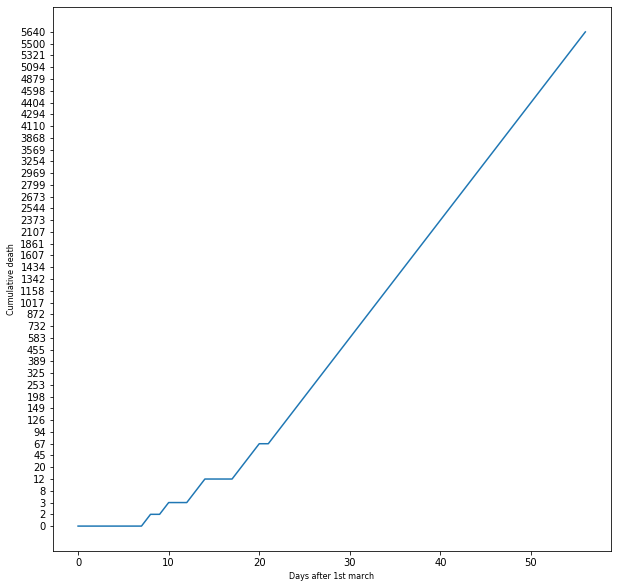

In [366]:
fig = plt.figure(figsize = (10,10))
plt.plot(r3)
plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()


fig = plt.figure(figsize = (10,10))
plt.plot(fdata[:,2])
plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()


In [370]:
#linregress(r3, np.arange(0,57,1,dtype='float'))

In [389]:
#exercise 2
def create_polynomial_data_matrix(week_data,polynomial):
    data_matrix = np.empty((0,(polynomial)),int)
    i=0
    while i<len(week_data):
        j=0
        temp_pol = polynomial
        coeffecients = np.empty(0,int)
        while j<temp_pol:
            coeffecients = np.append(coeffecients,np.array([(i)**(j)]))
            j += 1
        coeffecients = np.sort(coeffecients)[::-1]
        #coeffecients = np.append(coeffecients,[1])
        data_matrix = np.append(data_matrix,[np.array(coeffecients)],axis=0)
        i += 1
    return data_matrix


AP3 = create_polynomial_data_matrix(week3_data,10)

AP3T = AP3.transpose()

AP3T_dot_AP3 = np.dot(AP3T,AP3)

det_AP3T_dot_AP3 = np.linalg.det(AP3T_dot_AP3)

inv_AP3T_dot_AP3 = np.linalg.inv(AP3T_dot_AP3)

xp3 = np.dot(inv_AP3T_dot_AP3,np.dot(AP3T,z3))


In [390]:
def p_regression(dep_var):
    approximate_output_matrix = np.empty(0)
    dep_var = dep_var[::-1]
    i=0;
    while i<len(fdata):
        j=0
        result = 0
        while j<len(dep_var):
            result = result+(dep_var[j]*(i**j))
            j += 1
        approximate_output_matrix = np.append(approximate_output_matrix,[result],axis=0)
        i += 1
    return approximate_output_matrix
pr3 = p_regression(x3)

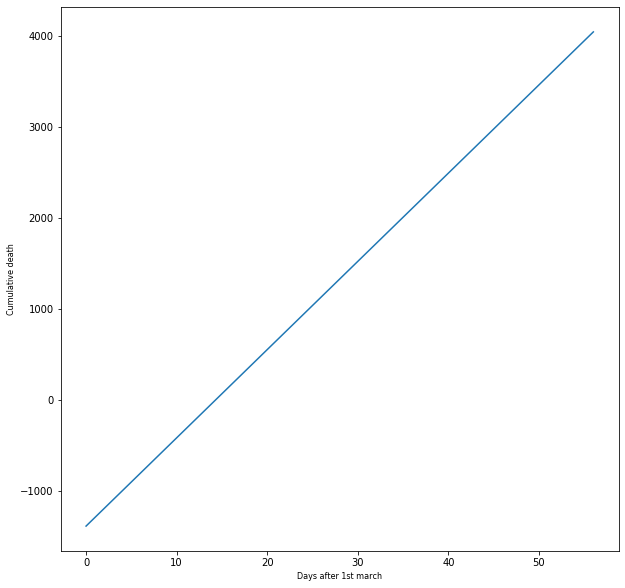

In [382]:
fig = plt.figure(figsize = (10,10))
plt.plot(pr3)
plt.xlabel('Days after 1st march',fontsize=8)
plt.ylabel('Cumulative death',fontsize=8)
plt.show()